In [ ]:
# 독립표본 t-검정정
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\HomePc\\Desktop\\데이터분석수업\\강의용데이터\\data\\ind_ttest.csv")

# 데이터 탐색
df.head()

,group,height
0,A,3.2
1,A,3.2
2,A,3.1
3,A,2.3
4,A,2.8


In [ ]:
df.groupby('group').count() # 그룹별 표본 크기

,height
group,
A,45
B,45


In [ ]:
df.groupby('group').mean() # 그룹별 평균

,height
group,
A,2.764444
B,2.973333


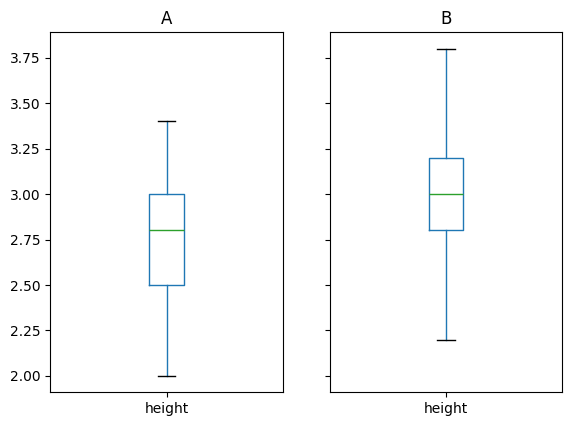

In [5]:
df.groupby('group').boxplot(grid=False)
plt.show()

In [8]:
group_1 = df.loc[df.group=='A', 'height']
group_2 = df.loc[df.group=='B', 'height']
print(group_1)
print(group_2)

0     3.2
1     3.2
2     3.1
3     2.3
4     2.8
5     2.8
6     3.3
7     2.4
8     2.9
9     2.7
10    2.0
11    3.0
12    2.2
13    2.9
14    2.9
15    3.1
16    3.0
17    2.7
18    2.2
19    2.5
20    3.2
21    2.8
22    2.5
23    2.8
24    2.9
25    3.0
26    2.8
27    3.0
28    2.9
29    2.6
30    2.4
31    2.4
32    2.7
33    2.7
34    3.0
35    3.4
36    3.1
37    2.3
38    3.0
39    2.5
40    2.6
41    3.0
42    2.6
43    2.3
44    2.7
Name: height, dtype: float64
45    3.3
46    2.7
47    3.0
48    2.9
49    3.0
50    3.0
51    2.5
52    2.9
53    2.5
54    3.6
55    3.2
56    2.7
57    3.0
58    2.5
59    2.8
60    3.2
61    3.0
62    3.8
63    2.6
64    2.2
65    3.2
66    2.8
67    2.8
68    2.7
69    3.3
70    3.2
71    2.8
72    3.0
73    2.8
74    3.0
75    2.8
76    3.8
77    2.8
78    2.8
79    2.6
80    3.0
81    3.4
82    3.1
83    3.0
84    3.1
85    3.1
86    3.1
87    2.7
88    3.2
89    3.3
Name: height, dtype: float64


In [11]:
# 정규성 검정
print(stats.shapiro(group_1))
print(stats.shapiro(group_2))

ShapiroResult(statistic=0.9762211476884743, pvalue=0.47526174521464826)
ShapiroResult(statistic=0.9655793845943673, pvalue=0.19880131424684516)


In [12]:
# 등분산성 검정
stats.levene(group_1,group_2)

LeveneResult(statistic=0.17112299465240605, pvalue=0.6801221033113707)

In [13]:
# 독립표본 t-검정
result = stats.ttest_ind(group_1,group_2,equal_var=True)
result

TtestResult(statistic=-3.039599233138954, pvalue=0.003119416422557232, df=88.0)

In [ ]:
# 대응표본 t-검정
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\HomePc\\Desktop\\데이터분석수업\\강의용데이터\\data\\paired_ttest.csv")

# 데이터 탐색
df.head()

,student,before,after
0,1,63,69
1,2,65,65
2,3,56,62
3,4,100,91
4,5,88,78


In [ ]:
df[['before', 'after']].mean()   # 그룹별 평균

before    78.1250
after     79.4375
dtype: float64

In [16]:
(df['after']-df['before']).mean()   # before, after 차이의 평균

1.3125

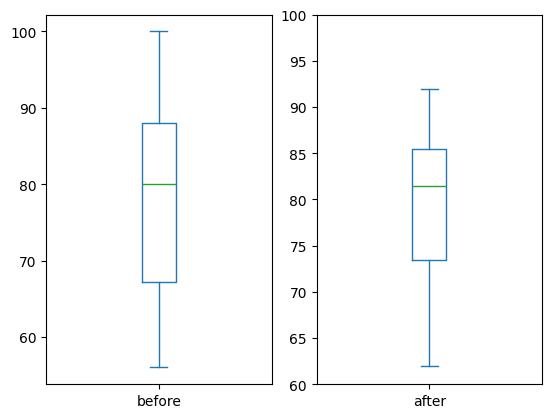

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df['before'].plot.box(grid=False, ax= axes[0])
plt.ylim([60,100])
df['after'].plot.box(grid=False, ax =axes[1])
plt.show()

In [18]:
# 정규성 검정
stats.shapiro(df['after']-df['before'])

ShapiroResult(statistic=0.9676112770019861, pvalue=0.7985877228216062)

In [20]:
# 대응표본 t-검정
result = stats.ttest_rel(df['before'],df['after'])
result

TtestResult(statistic=-0.7497768853141169, pvalue=0.4649871003972206, df=15)

In [21]:
# 맨 휘트니 U 검정
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\HomePc\\Desktop\\데이터분석수업\\강의용데이터\\data\\mw_test.csv")

# 데이터 탐색
df.head()

,group,score
0,A,10
1,A,12
2,A,22
3,A,15
4,A,21


In [22]:
df.groupby('group').count()    # 그룹별 표본 크기

,score
group,
A,5
B,4


In [24]:
df.groupby('group').mean()     # 그룹별 평균 

,score
group,
A,16.00
B,22.25


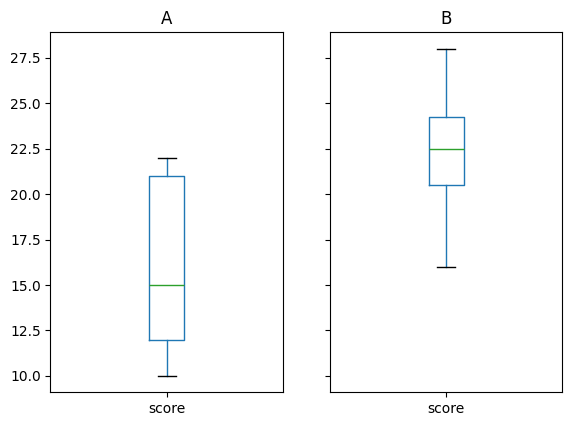

In [25]:
df.groupby('group').boxplot(grid=False)
plt.show()

In [28]:
group_1 = df.loc[df.group=='A', 'score']
group_2 = df.loc[df.group=='B', 'score']

# 맨 휘트니 U 검정
stats.mannwhitneyu(group_1,group_2)

MannwhitneyuResult(statistic=2.5, pvalue=0.08509993251567075)

In [29]:
# 윌콕슨 부호 순위 검정
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\HomePc\\Desktop\\데이터분석수업\\강의용데이터\\data\\wilcoxon_test.csv")
df

,pre,post
0,78,79
1,76,72
2,87,81
3,82,83
4,75,69
5,88,74
6,70,77
7,83,68


In [30]:
# 데이터 탐색
df.mean()    # 그룹별 평균균

pre     79.875
post    75.375
dtype: float64

In [ ]:
(df['post']-df['pre']).mean()    # pre,post 차이의 평균

-4.5

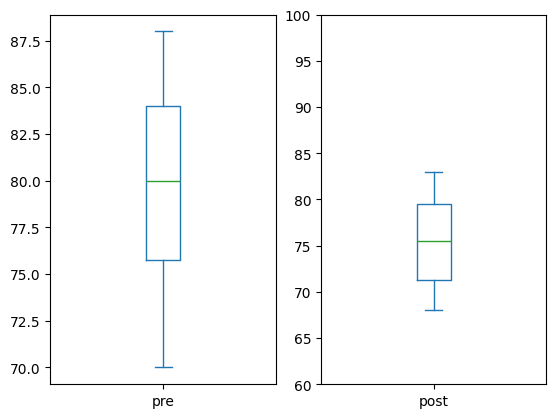

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2)
df['pre'].plot.box(grid=False, ax=axes[0])
plt.ylim([60,100])
df['post'].plot.box(grid=False, ax = axes[1])
plt.show()

In [33]:
# 윌콕슨 부호 순위 검정
stats.wilcoxon(df['pre'],df['post'])

WilcoxonResult(statistic=9.0, pvalue=0.25)

In [34]:
# 카이제곱 검정

from scipy import stats

men = [10,10]
women = [15,65]

# 카이제곱 검정
stats.chi2_contingency([men,women])

Chi2ContingencyResult(statistic=6.750000000000001, pvalue=0.009374768459434897, dof=1, expected_freq=array([[ 5., 15.],
       [20., 60.]]))

In [35]:
# 피셔의 정확 검정
from scipy import stats

group_A = [7,3]
group_B = [2,9]

# 기대 빈도
stats.chi2_contingency([group_A,group_B])[3]

array([[4.28571429, 5.71428571],
       [4.71428571, 6.28571429]])

In [36]:
# 피셔의 정확 검정
stats.fisher_exact([group_A,group_B])

SignificanceResult(statistic=10.5, pvalue=0.029973122852379817)

In [ ]:
# 데이터셋 읽기
import seaborn as sns
from scipy import stats

df = sns.load_dataset('titanic')

# 선실(pclass)과 생존여부(alive) 컬럼에 대해 피벗을 적용하여 교차표를 작성 한 후 내용 확인인
result = df.pivot_table(index='pclass',
                        columns='alive',
                        values='alone',
                        aggfunc='count')
result

alive,no,yes
pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
# 선실별 생존 비율 계산
result['yes']/(result.sum(axis=1))

pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

In [ ]:
# 교차표의 기대 빈도를 확인
stats.chi2_contingency(result)[3]

array([[133.09090909,  82.90909091],
       [113.37373737,  70.62626263],
       [302.53535354, 188.46464646]])

In [ ]:
# 카이제곱 검정을 실시한 후 p-value 값을 확인 
stats.chi2_contingency(result)[1]

4.549251711298793e-23